In [45]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [46]:
imgName = '3.jpg'

name = imgName.split('.')[0]
ext = imgName.split('.')[1]
outName = name+'_Out12.'+ext

In [47]:
def printImg(img,inDisplay = False,gray = False):
    temp_img = img
    #temp_img = cv2.resize(img,(650,300))
    if inDisplay:
        if gray:
            plt.imshow(temp_img,cmap=plt.cm.gray)
        else:
            plt.imshow(temp_img)
        return
    cv2.imshow('Output',temp_img)
    cv2.waitKey(0)

In [48]:
# It will read image in BGR form
# 0 --> Black
# 1 --> White
img = cv2.imread(imgName)
print(img.shape)
#printImg(img)

(315, 394, 3)


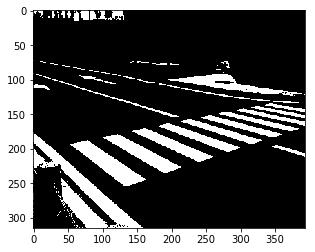

In [49]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#print(gray.shape)
# Thresholding arguments --> (grayscale image, threshold value, maxVal, type)
# ret, thresh = cv2.threshold(gray,250,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret, thresh = cv2.threshold(gray,170,255,cv2.THRESH_BINARY)
#print(thresh.shape)
printImg(thresh,True,True)

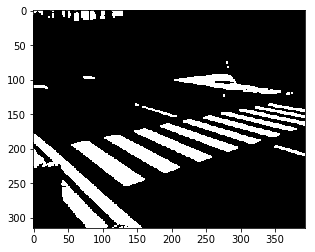

In [50]:
# Noise Removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 1)
printImg(opening,True,True)

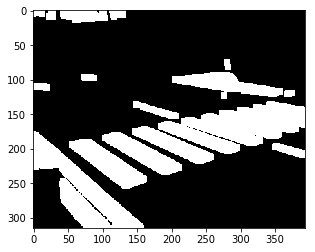

In [51]:
# Sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
printImg(sure_bg,True,True)

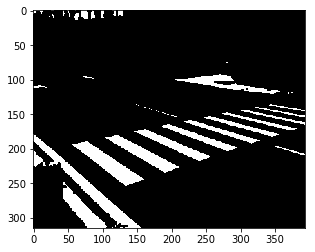

In [52]:
# Sure foreground area
sure_fg = cv2.erode(opening,kernel,iterations=1)
printImg(sure_fg,True,True)

# Finding unknown region
unknown = cv2.subtract(sure_bg,sure_fg)
#printImg(unknown)

(315, 394)


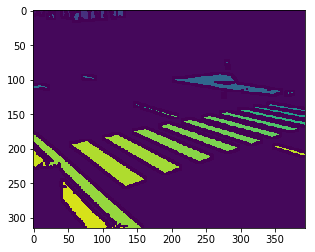

In [53]:
# Now we know for sure which are region of lans, which are background and all. 
# So we create marker (it is an array of same size as that of original image, but with int32 datatype) and 
# label the regions inside it.
# The regions we know for sure (whether foreground or background) are labelled with any positive integers,
# but different integers, and the area we don't know for sure are just left as zero
#  For this we use cv.connectedComponents(). It labels background of the image with 0, 
# then other objects are labelled with integers starting from 1.

ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0
print(markers.shape)
printImg(markers,True)

In [54]:
# Now applying watershed algorithm to detect markers edge
markers = cv2.watershed(img,markers)

# '-1' valuse in markers array indica
img[markers == -1] = [0,255,0]

True

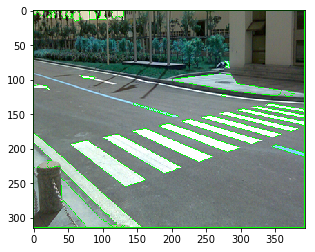

In [55]:
printImg(img,True)
cv2.imwrite(outName,img)